# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).



Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.



__Задание__. Необходимо выполнить два задания



1) Добейтесь accuracy **на валидации не менее 0.4**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов



2) Добейтесь accuracy **на валидации не менее 0.8**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов



Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.



Ваш код обязательно должен проходить все `assert`'ы ниже.



__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.





__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.4)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.4) / 0.4)` для второго. Оценка округляется до десятых по арифметическим правилам.





__Советы и указания__:

 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)

 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)

 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.

 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)

 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.

 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету

 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.

 - Фиксируйте random seed.

 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.

 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.

 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.



Good luck & have fun! :)

In [1]:
!pip install wandb
!pip install pytorch_lightning==1.9.0 torchmetrics

**✨ Внимание ✨**



В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:



1. Получить к ней доступ с помощью VPN.



2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:



```shell

git submodule update --init --recursive

make docs

```

После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).



3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉



4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
# You may add any imports you need

In [4]:
!pip install gdown
import gdown
import zipfile

In [5]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(123456)

In [6]:
torch.cuda.is_available()

True

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.

2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)



```

  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)



  trainer.tune(module, train_dataloader, eval_dataloader)



  trainer.fit(module, train_dataloader, eval_dataloader))

```







3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)

4. Подбор архитектуры модели.

5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:



  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`

  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)

6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)

7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.

 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)

 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [7]:
gdown.download('https://drive.google.com/uc?id=1a9v9PbQ0ZveSZo6C1omWFjs122bgquJa', 'train.zip', quiet=False)
gdown.download('https://drive.google.com/uc?id=1JghNkdB4UrCylR3rlZuKPfVcNlJpIM7G', 'val.zip', quiet=False)

with zipfile.ZipFile('train.zip', 'r') as zip_ref:
  zip_ref.extractall('train')
with zipfile.ZipFile('val.zip', 'r') as zip_ref:
  zip_ref.extractall('val')

Downloading...
From (original): https://drive.google.com/uc?id=1a9v9PbQ0ZveSZo6C1omWFjs122bgquJa
From (redirected): https://drive.google.com/uc?id=1a9v9PbQ0ZveSZo6C1omWFjs122bgquJa&confirm=t&uuid=bb935b7e-5265-4bd9-956d-a7c1ff224ebd
To: /kaggle/working/train.zip
100%|██████████| 1.01G/1.01G [00:07<00:00, 130MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1JghNkdB4UrCylR3rlZuKPfVcNlJpIM7G
From (redirected): https://drive.google.com/uc?id=1JghNkdB4UrCylR3rlZuKPfVcNlJpIM7G&confirm=t&uuid=6272e9a3-b32d-439e-80c3-e7e84e960c36
To: /kaggle/working/val.zip
100%|██████████| 54.9M/54.9M [00:00<00:00, 184MB/s]


In [69]:
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
) # сем 3

val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ]
) # сем 3

train_dataset = ImageFolder('train/train', transform=train_transform)
val_dataset = ImageFolder('val/val', transform=val_transform)

batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [70]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

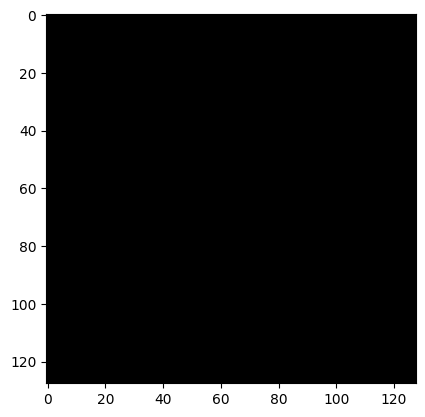

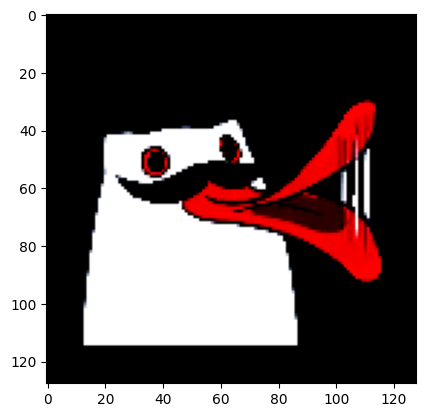

In [71]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[2].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[120].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.



5 баллов

Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.





Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)

4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [61]:
from torchvision.models import resnet18

### Тренировочный класс lightning

In [62]:
from torch.optim.lr_scheduler import CosineAnnealingLR

In [72]:
class YourModule(pl.LightningModule): #семинар 5
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(self.model.fc.in_features, 100)
        self.learning_rate = learning_rate
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        optimizer = self.optimizer
        scheduler = CosineAnnealingLR(optimizer, T_max=15) # количество эпох
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'multiclass',  num_classes=100)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)
        current_lr = self.optimizer.param_groups[0]['lr']
        self.log("learning_rate", current_lr, prog_bar=True)
        return acc

In [73]:
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = ("cuda:0") if torch.cuda.is_available() else ("cpu")

model = resnet18(pretrained = False, num_classes=100).to(device)
module = YourModule(model, 0.0005)

In [74]:
trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=15, auto_lr_find=True)
trainer.tune(module, train_dataloader, val_dataloader)
trainer.fit(module, train_dataloader, val_dataloader)
wandb.finish()

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

accuracy,▁▂▁▃▃▄▄▅▆▇▇▇▇██
epoch,▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇█
learning_rate,██▇▇▆▆▅▄▃▃▂▂▁▁▁
train_loss,▇█▇▇▆▇▇▆▆▆▇▆▆▆▆▆▅▆▆▅▄▅▄▄▄▄▅▃▃▃▃▃▂▃▂▂▂▂▂▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇█████
val_loss,▇█▆▅▅▃▃▂▂▂▁▁▂▁▁
accuracy,0.2516
epoch,14
learning_rate,0
train_loss,1.86306
trainer/global_step,5354


### Валидация результатов задания

In [75]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    return accuracy

In [76]:
model = module
accuracy_1 = evaluate_task(model, val_dataloader)
print('')
print(f"accuracy: {accuracy_1}")
print(f"Оценка за это задание составит {np.clip(5 * accuracy_1 / 0.24, 0, 5):.2f} баллов")

100%|██████████| 20/20 [00:01<00:00, 12.17it/s]


accuracy: 0.2516
Оценка за это задание составит 5.00 баллов


ура🤪

## Задание 2



5 баллов

Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.



Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:

1. Аугментация (без нее сложно очень будет)

2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.

3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).

4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.

5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [86]:
from torchvision.models import efficientnet_b0

### Тренировочный класс lightning


In [87]:
train_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)), #уже можно
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
) # сем 3

val_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ]
) # сем 3

train_dataset = ImageFolder('train/train', transform=train_transform)
val_dataset = ImageFolder('val/val', transform=val_transform)

batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [99]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, 100)
        self.learning_rate = learning_rate
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = self.optimizer
        scheduler = CosineAnnealingLR(optimizer, T_max=4) # количество эпох
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, targets = train_batch
        preds = self(images)
        loss = self.loss(preds, targets)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, targets = val_batch
        preds = self(images)
        loss = self.loss(preds, targets)
        acc = accuracy(torch.argmax(preds, dim=-1), targets, task="multiclass", num_classes=100)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)
        current_lr = self.optimizer.param_groups[0]['lr']
        self.log("learning_rate", current_lr, prog_bar=True)
        return acc

In [100]:
wandb_logger = WandbLogger(project='pretrained_model', log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = ("cuda:0") if torch.cuda.is_available() else ("cpu")

model = efficientnet_b0(pretrained=True).to(device)
module = YourModule(model, 0.0005)

In [101]:
trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=4, auto_lr_find=True)
trainer.tune(module, train_dataloader, val_dataloader)
trainer.fit(module, train_dataloader, val_dataloader)
wandb.finish()

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

accuracy,▁▄▇█
epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▆▆▆▆▆▆▆▆████████
learning_rate,█▅▂▁
train_loss,█▇▇█▆▇▆▄▅▄▄▅▄▅▂▃▃▃▂▃▃▁▂▂▂▂▂▁
trainer/global_step,▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇███
val_loss,█▄▂▁
accuracy,0.368
epoch,3
learning_rate,0
train_loss,1.71591
trainer/global_step,1427


### Валидация результатов задания

In [102]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    return accuracy

In [103]:
model = module
accuracy_1 = evaluate_task(model, val_dataloader)
print('')
print(f"accuracy: {accuracy_1}")
print(f"Оценка за это задание составит {np.clip(5 * accuracy_1 / 0.34, 0, 5):.2f} баллов")

100%|██████████| 20/20 [00:03<00:00,  5.35it/s]


accuracy: 0.368
Оценка за это задание составит 5.00 баллов


еще раз ура

# Отчёт об экспериментах



текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

[задание 1](https://wandb.ai/irinabramovaa04-higher-school-of-economics/lightning_logs/reports/-1--VmlldzoxMDAzMjAzNA?accessToken=9ulrt5jcoswvxmxzaile9hbr5pgl41ydooauv4216lgy4azgqimt9ym70fbdneha)

[задание 2](https://api.wandb.ai/links/irinabramovaa04-higher-school-of-economics/6rg7y1rx)